In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [2]:
# importing libraries for learning
from keras.models import Sequential
from keras.layers import (
     LSTM,
     Dense,
     SimpleRNN,
     Dropout,
     GRU,
     Bidirectional
    )

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#the start and end date
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2024,4,1)

#loading from yahoo finance
data = yf.download("TSLA",start_date, end_date)

print(data.head())
print(data.tail())


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-04-01  33.599998  34.263332  31.673332  32.104000  32.104000  200298000
2020-04-02  32.068668  32.950668  29.760000  30.298000  30.298000  297876000
2020-04-03  33.966667  34.366001  31.226000  32.000668  32.000668  338431500
2020-04-06  34.080002  34.733334  33.197334  34.416000  34.416000  223527000
2020-04-07  36.333332  37.666668  35.489334  36.363335  36.363335  268797000
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2024-03-22  166.690002  171.199997  166.300003  170.830002  170.830002  \
2024-03-25  168.759995  175.240005  168.729996  172.630005  172.630005   
2024-03-26  178.580002  184.250000  177.380005  177.669998  177.669998   
2024-03-27  181.410004

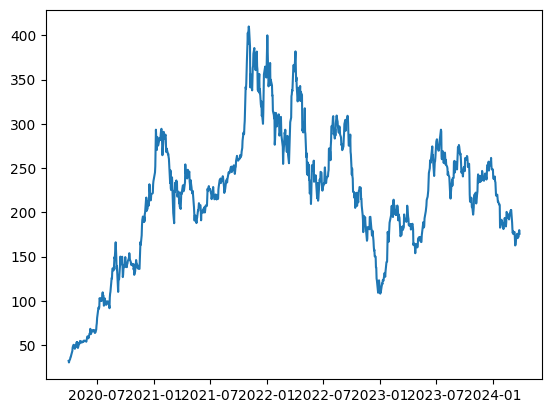

In [4]:
plt.plot(data['Close'])

In [5]:
# Setting 80 percent data for training
training_data = math.ceil(len(data) * .8)

training_data_len = training_data

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(804, 1) (201, 1)


In [6]:
# Selecting Open Price values
dataset_train = train_data.Open.values
dataset_test = test_data.Open.values

# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_test = np.reshape(dataset_test, (-1,1))

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.fit_transform(dataset_test)

In [8]:
# The data is converted to Numpy array; one day ahead forecast
X_train = np.array(scaled_train[0:803])
y_train = np.array(scaled_train[1:804])

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (803, 1, 1) y_train : (803, 1)


### Siec rekurencyjna RNN

In [9]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = 'adam',
                  loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train,
              epochs = 20,
              batch_size = 2)
regressor.summary()


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0166
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 6/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 7/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 8/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 9/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 10/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 11/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 12/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 13/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 14/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 15/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 50)               │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 1, 50)               │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

### Sieć typu LSTM


In [10]:
#Initializing the RNN
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units = 50,
                   return_sequences = True,
                   input_shape = (X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))

# Adding second hidden layer
regressorLSTM.add(LSTM(units = 50,
                   return_sequences = True))
regressorLSTM.add(Dropout(0.2))

# Adding dense layer to get the final output. The input of n-1 layer, will be the output for n layer.
regressorLSTM.add(Dense(units = 1))

regressorLSTM.compile(optimizer = 'adam',
                      loss = "mean_squared_error")

# fitting the model
regressorLSTM.fit(X_train, y_train,
              epochs = 20,
              batch_size = 2)
regressorLSTM.summary()

Epoch 1/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0942
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 6/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024
Epoch 7/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 8/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 9/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 10/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 11/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 12/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 13/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 14/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 15/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1, 1)                │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

### Porównanie modeli

In [11]:
# The data is converted to Numpy array; one day ahead forecast
X_test = np.array(scaled_test[0:200])
y_test = np.array(scaled_test[1:201])

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM = np.reshape(y_LSTM, (y_LSTM.shape[0],1))

y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)

print(mean_absolute_error(scaler.inverse_transform(y_test), y_RNN_O))
print(mean_absolute_error(scaler.inverse_transform(y_test), y_LSTM_O))

X_test : (200, 1, 1) y_test : (200, 1)
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
6.264072570800781
6.133843688964844


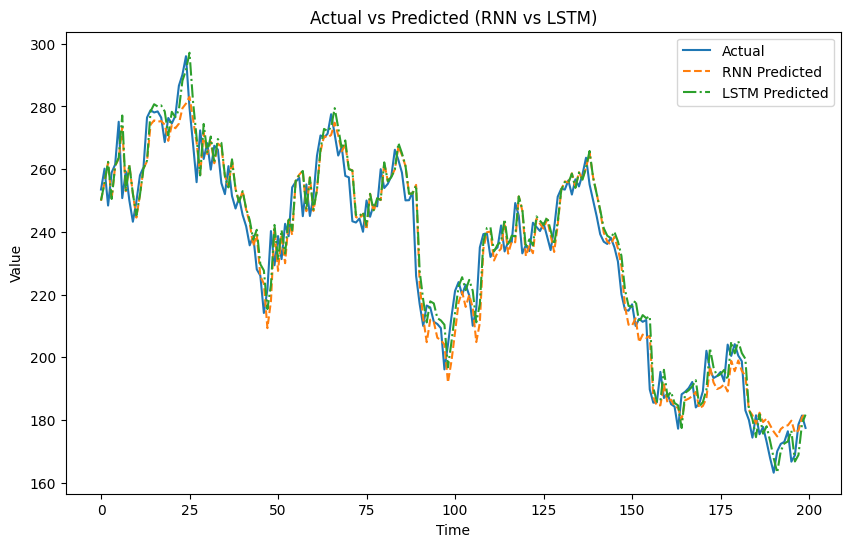

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(y_RNN_O, label='RNN Predicted', linestyle='--')
plt.plot(y_LSTM_O, label='LSTM Predicted', linestyle='-.')
plt.title('Actual vs Predicted (RNN vs LSTM)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### TODO:
1. dodaj sieć typu GRU oraz model addytywny, porównaj wyniki
2. przedstaw wyniki na wykresach szeregów czasowych
3. wykonaj hiperparametryzacje wybranego modelu

### 3. dodaj sieć typu GRU oraz model addytywny, porównaj wyniki

In [35]:
#Initializing the GRU
regressorGRU = Sequential()
regressorGRU.add(GRU(units = 50,
                   return_sequences = True,
                   input_shape = (X_train.shape[1],1)))

regressorGRU.add(Dropout(0.2))
# Adding second hidden layer
regressorGRU.add(LSTM(units = 50,
                   return_sequences = True))
regressorGRU.add(Dropout(0.2))
# Adding dense layer to get the final output. The input of n-1 layer, will be the output for n layer.
regressorGRU.add(Dense(units = 1))

regressorGRU.compile(optimizer = 'adam',
                      loss = "mean_squared_error")

# fitting the model
regressorGRU.fit(X_train, y_train,
              epochs = 20,
              batch_size = 2)
regressorGRU.summary()

Epoch 1/20


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0690
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024
Epoch 6/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 7/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024
Epoch 8/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
Epoch 9/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 10/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 11/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 12/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 13/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 14/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 15/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 1, 50)               │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 1)                │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,605 (330.49 KB)

 Trainable params: 28,201 (110.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,404 (220.33 KB)

In [37]:
# Predykcja dla modelu GRU
y_GRU = regressorGRU.predict(X_test)
y_GRU_O = scaler.inverse_transform(np.reshape(y_GRU, (y_GRU.shape[0], 1)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [36]:
import pandas as pd
from prophet import Prophet

prophet_df = data.copy()
# Przygotowanie danych w odpowiednim formacie
prophet_df['Date'] = prophet_df.index
prophet_df.reset_index(drop=True, inplace=True)
prophet_df = prophet_df[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']

# Inicjalizacja modelu Prophet
model = Prophet()

# Dopasowanie modelu do danych
model.fit(prophet_df)

# Tworzenie ramki danych dla przyszłych prognoz
future = model.make_future_dataframe(periods=365)  # Prognoza na kolejny rok

# Prognozowanie wartości
forecast = model.predict(future)

# Wyświetlenie prognoz
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


12:09:16 - cmdstanpy - INFO - Chain [1] start processing
12:09:17 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
1365 2025-03-24  175.079512   64.361588  281.952838
1366 2025-03-25  175.682076   72.035347  286.554355
1367 2025-03-26  177.541068   70.874676  287.085136
1368 2025-03-27  177.991293   78.315015  290.978194
1369 2025-03-28  178.977636   70.218490  289.377232


### 2. przedstaw wyniki na wykresach szeregów czasowych

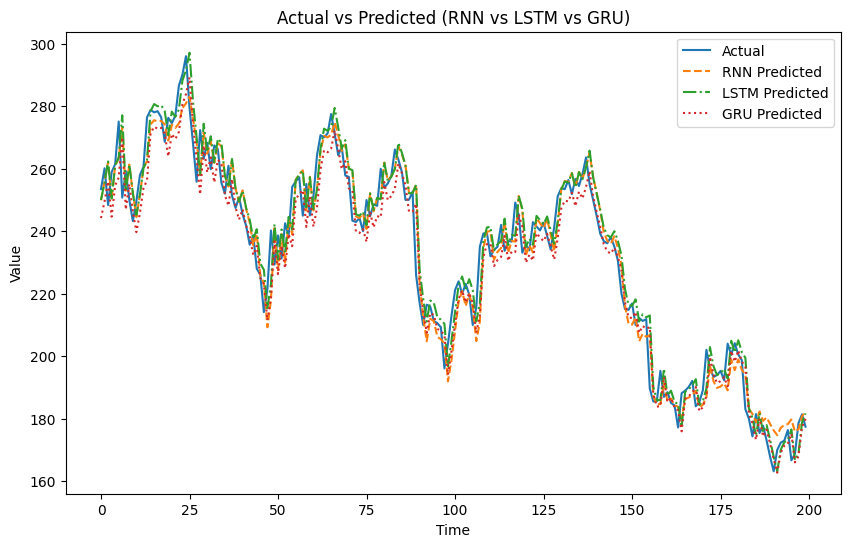

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(y_RNN_O, label='RNN Predicted', linestyle='--')
plt.plot(y_LSTM_O, label='LSTM Predicted', linestyle='-.')
plt.plot(y_GRU_O, label='GRU Predicted', linestyle=':')

plt.title('Actual vs Predicted (RNN vs LSTM vs GRU)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Mean Absolute Error (RNN): 6.264072570800781
Mean Absolute Error (LSTM): 6.133843688964844
Mean Absolute Error (GRU): 6.389154891967774


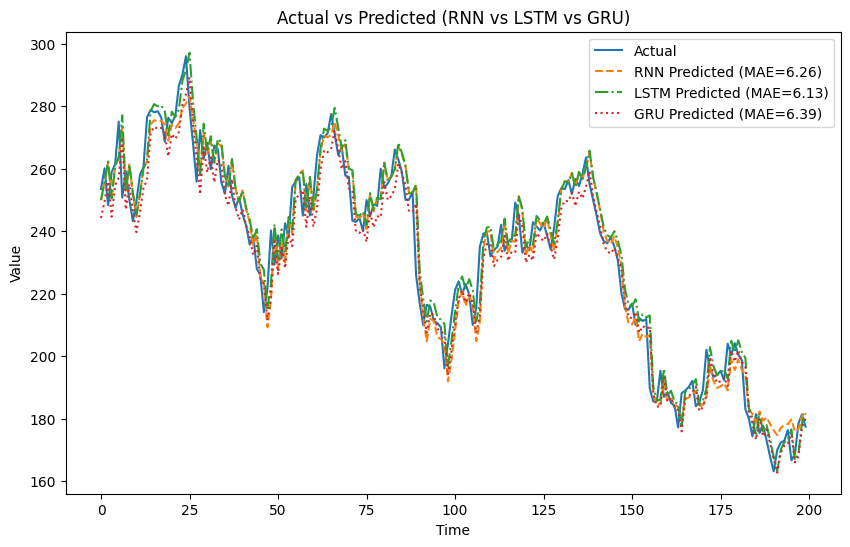

In [40]:
# Calculate mean absolute error for each model
mae_RNN = mean_absolute_error(scaler.inverse_transform(y_test), y_RNN_O)
mae_LSTM = mean_absolute_error(scaler.inverse_transform(y_test), y_LSTM_O)
mae_GRU = mean_absolute_error(scaler.inverse_transform(y_test), y_GRU_O)

# Print mean absolute errors
print("Mean Absolute Error (RNN):", mae_RNN)
print("Mean Absolute Error (LSTM):", mae_LSTM)
print("Mean Absolute Error (GRU):", mae_GRU)

# Plot actual vs predicted values for RNN, LSTM, and GRU on the same plot
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(y_RNN_O, label=f'RNN Predicted (MAE={mae_RNN:.2f})', linestyle='--')
plt.plot(y_LSTM_O, label=f'LSTM Predicted (MAE={mae_LSTM:.2f})', linestyle='-.')
plt.plot(y_GRU_O, label=f'GRU Predicted (MAE={mae_GRU:.2f})', linestyle=':')

plt.title('Actual vs Predicted (RNN vs LSTM vs GRU)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### 3. Hiperparametryzacja LSTM

**Jeśli długo robi się hiperparametryzacja:**

    units = [50, 64]  # Number of units in LSTM layer
    
    dropout = [0.2, 0.3]  # Dropout rate
    
    learning_rate = [0.001, 0.01]  # Learning rate
    
  **ustalcie zmianę tylko jednego parametru, np.**
   
    units = [50]  # Number of units in LSTM layer
    
    dropout = [0.2]  # Dropout rate
    
    learning_rate = [0.001, 0.01]  # Learning rate

In [46]:
# Define hyperparameters
units = [50, 64]  # Number of units in LSTM layer
dropout = [0.2, 0.3]  # Dropout rate
learning_rate = [0.001, 0.01]  # Learning rate
epochs = 20
batch_size = 2

best_mae = float('inf')
best_params = {}

# Iterate over hyperparameters and train models
for unit in units:
    for drop in dropout:
        for lr in learning_rate:
            print(f"Training model with units={unit}, dropout={drop}, learning_rate={lr}...")
            
            # Create and compile model
            model = create_LSTM_model(units=unit, dropout=drop, learning_rate=lr)
            
            # Fit the model
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # Predict the values
            y_pred = model.predict(X_test)
            
            # Reshape y_pred to match the shape of y_test
            y_pred = y_pred.reshape(y_test.shape)
            
            # Calculate Mean Absolute Error
            mae = mean_absolute_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))
            print("Mean Absolute Error:", mae)
            
            # Check if current model is the best
            if mae < best_mae:
                best_mae = mae
                best_params = {'units': unit, 'dropout': drop, 'learning_rate': lr}

print("Best Mean Absolute Error:", best_mae)
print("Best Parameters:", best_params)


Training model with units=50, dropout=0.2, learning_rate=0.001...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Mean Absolute Error: 5.943022994995117
Training model with units=50, dropout=0.2, learning_rate=0.01...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Mean Absolute Error: 6.228911666870117
Training model with units=50, dropout=0.3, learning_rate=0.001...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Mean Absolute Error: 5.949939880371094
Training model with units=50, dropout=0.3, learning_rate=0.01...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Mean Absolute Error: 6.380692138671875
Training model with units=64, dropout=0.2, learning_rate=0.001...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Mean Absolute Error: 5.936612319946289
Training model with units=64, dropout=0.2, learning_rate=0.01...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Mean Absolute Error: 5.9875146484375
Training model with units=64, dropout=0.3, learning_rate=0.001...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Mean Absolute Error: 6.996601333618164
Training model with units=64, dropout=0.3, learning_rate=0.01...


C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Mean Absolute Error: 6.556186981201172
Best Mean Absolute Error: 5.936612319946289
Best Parameters: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001}


In [55]:
# model LSTM po hiperparametryzacji
# Zmień na najlepsze parametry
best_units = 64
best_dropout = 0.2
best_learning_rate = 0.001

regressorLSTM_h = Sequential()
regressorLSTM_h.add(LSTM(units = best_units,
                   return_sequences = True,
                   input_shape = (X_train.shape[1],1)))
regressorLSTM_h.add(Dropout(best_dropout))

# Adding second hidden layer
regressorLSTM_h.add(LSTM(units = best_units,
                   return_sequences = True))
regressorLSTM_h.add(Dropout(best_dropout))

# Adding dense layer to get the final output. The input of n-1 layer, will be the output for n layer.
regressorLSTM_h.add(Dense(units = 1))

optimizer = Adam(learning_rate=best_learning_rate)

regressorLSTM_h.compile(optimizer = optimizer,
                      loss = "mean_squared_error")

# fitting the model
regressorLSTM_h.fit(X_train, y_train,
              epochs = 20,
              batch_size = 2)
regressorLSTM_h.summary()

Epoch 1/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0787
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025
Epoch 6/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 7/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 8/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 9/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 10/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014
Epoch 11/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 12/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 13/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 14/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014
Epoch 15/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 1, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_47 (LSTM)                       │ (None, 1, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1, 1)                │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

In [56]:
y_LSTM_hyper = regressorLSTM_h.predict(X_test)
y_LSTM_hyper = np.reshape(y_LSTM_hyper, (y_LSTM_hyper.shape[0],1))

y_LSTM_O_H = scaler.inverse_transform(y_LSTM_hyper)

print(mean_absolute_error(scaler.inverse_transform(y_test), y_LSTM_O_H))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
5.989076309204101


MAE for LSTM hyper: 5.989076309204101


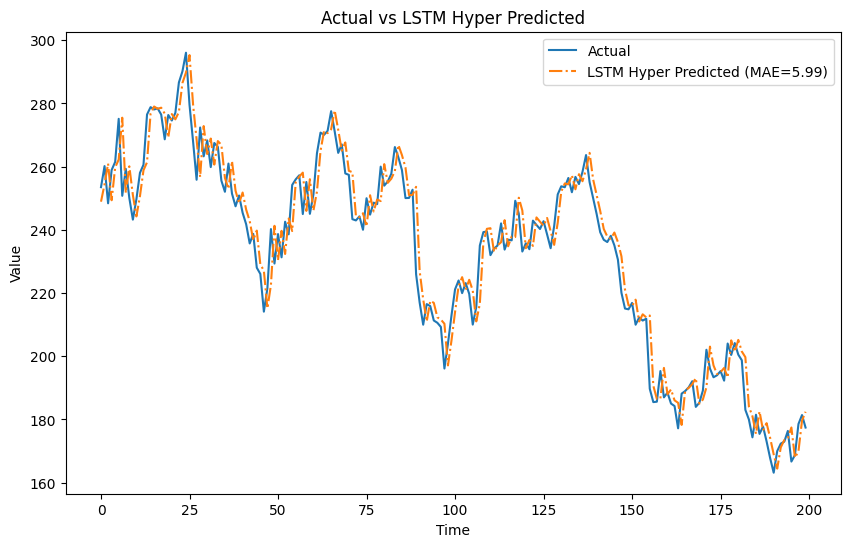

In [58]:
mae_LSTM_hyper = mean_absolute_error(scaler.inverse_transform(y_test), y_LSTM_O_H)
print("MAE for LSTM hyper:", mae_LSTM_hyper)

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(y_LSTM_O_H, label=f'LSTM Hyper Predicted (MAE={mae_LSTM_hyper:.2f})', linestyle='-.')
plt.title('Actual vs LSTM Hyper Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### LSTM basic vs tuned

Mean Absolute Error (LSTM): 6.133843688964844
Mean Absolute Error (LSTM hyper): 5.989076309204101


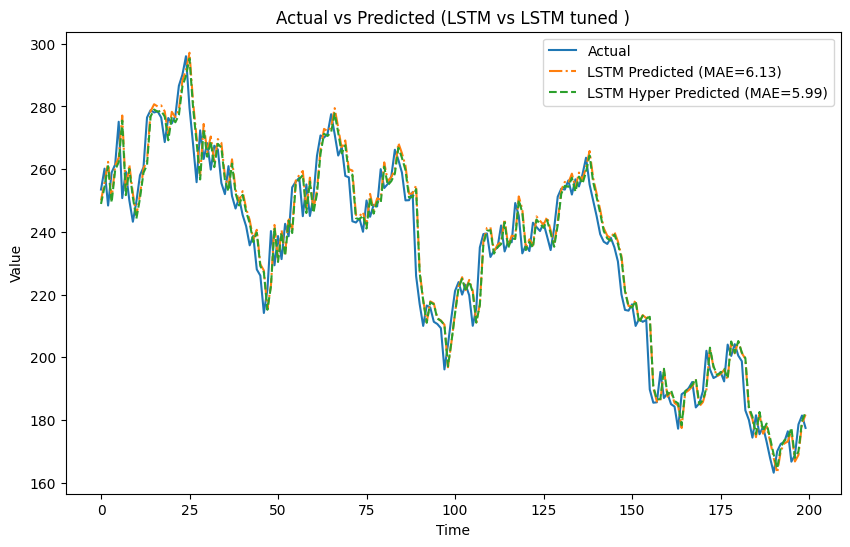

In [59]:

print("Mean Absolute Error (LSTM):", mae_LSTM)
print("Mean Absolute Error (LSTM hyper):", mae_LSTM_hyper)

# Plot actual vs predicted values for RNN, LSTM, and GRU on the same plot
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(y_LSTM_O, label=f'LSTM Predicted (MAE={mae_LSTM:.2f})', linestyle='-.')
plt.plot(y_LSTM_O_H, label=f'LSTM Hyper Predicted (MAE={mae_LSTM_hyper:.2f})', linestyle='--')

plt.title('Actual vs Predicted (LSTM vs LSTM tuned )')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


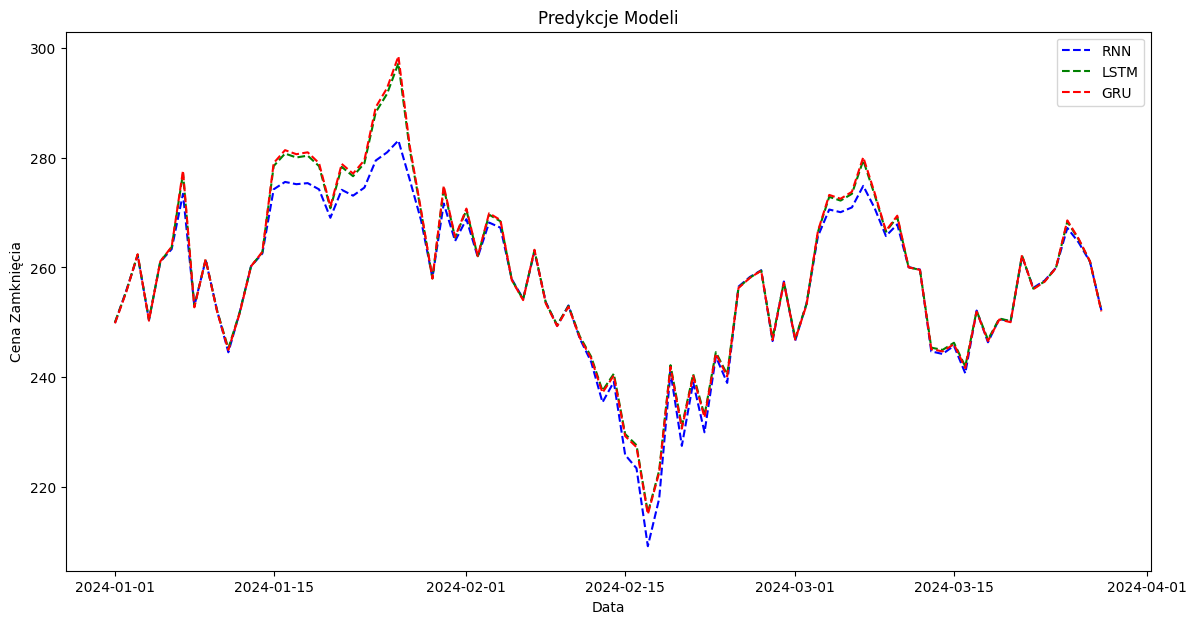

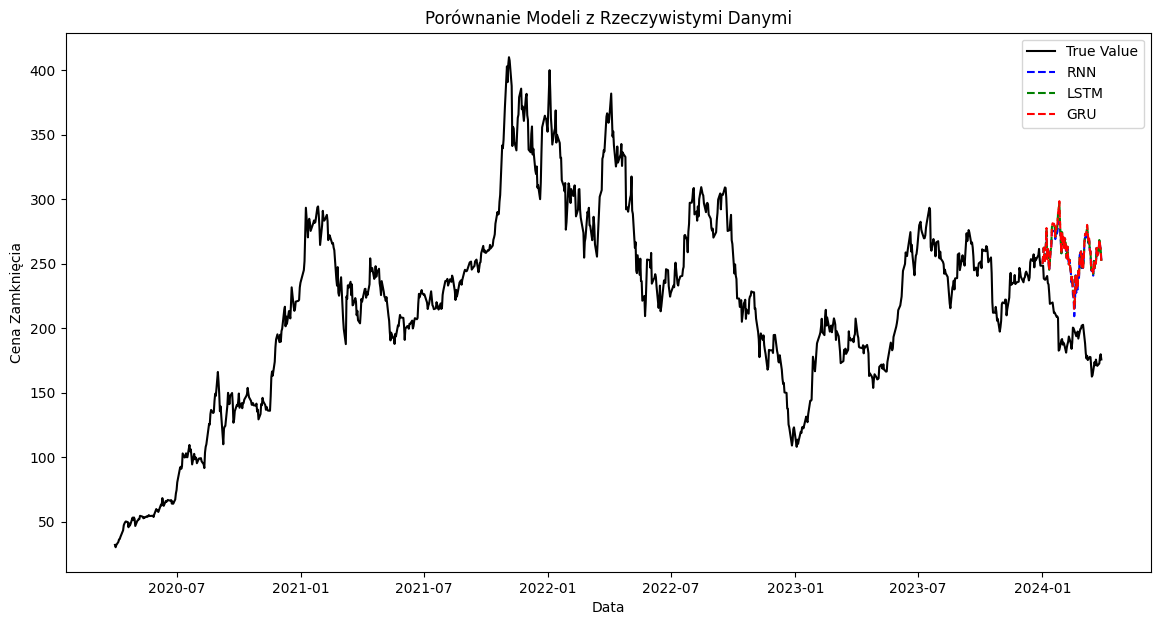

In [30]:
# time_index = pd.date_range(start=start_date, end=end_date, freq='D')

# # Przycięcie prognoz do długości time_index
# y_RNN_O_trimmed = y_RNN_O[:len(time_index)]
# y_LSTM_O_trimmed = y_LSTM_O[:len(time_index)]
# y_GRU_O_trimmed = y_GRU_O[:len(time_index)]

# # Wyświetlenie samych predykcji
# plt.figure(figsize=(14, 7))
# plt.plot(time_index, y_RNN_O_trimmed, label='RNN', linestyle='dashed', color='blue')
# plt.plot(time_index, y_LSTM_O_trimmed, label='LSTM', linestyle='dashed', color='green')
# plt.plot(time_index, y_GRU_O_trimmed, label='GRU', linestyle='dashed', color='red')
# plt.title('Predykcje Modeli')
# plt.xlabel('Data')
# plt.ylabel('Cena Zamknięcia')
# plt.legend()
# plt.show()

# # Przycięcie predykcji i porównanie z rzeczywistymi danymi
# plt.figure(figsize=(14, 7))
# plt.plot(data.index, data['Close'], label='True Value', color='black')
# plt.plot(time_index, y_RNN_O_trimmed, label='RNN', linestyle='dashed', color='blue')
# plt.plot(time_index, y_LSTM_O_trimmed, label='LSTM', linestyle='dashed', color='green')
# plt.plot(time_index, y_GRU_O_trimmed, label='GRU', linestyle='dashed', color='red')
# plt.title('Porównanie Modeli z Rzeczywistymi Danymi')
# plt.xlabel('Data')
# plt.ylabel('Cena Zamknięcia')
# plt.legend()
# plt.show()
